### <center>M1 SID - Analyse et exploitation de données</center>
# <center>Image - TP1 : Indexation d'images par la texture</center>
## <center>Emma Grandgirard</center>

In [27]:
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import *
import numpy as np
import os

os.chdir(os.path.join(os.getcwd(), 'Images', 'Images'))

## 1. Lecture d'une image RGB

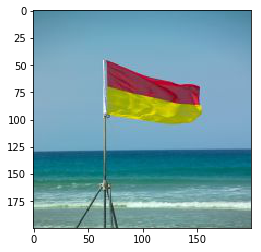

In [28]:
img = imread('45.jpg')
plt.imshow(img)

In [29]:
l, c, p = img.shape
l, c, p

(200, 200, 3)

La commande shape donne la taille de l'image : nombre de lignes, nombre de colonnes, nombre de plans.

## 2. Impact de la quantification

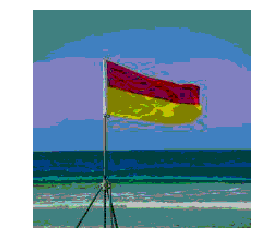

In [30]:
imgq = np.bitwise_and(img, 128) + np.bitwise_and(img, 64)
axis('off')
plt.imshow(imgq)

L'image est différente mais reconnaissable.

In [5]:
rmse = np.sqrt(np.mean((img.astype(float)-imgq.astype(float))**2))
rmse

36.29945993629474

L'erreur quadratique moyenne entre l'image de départ et l'image d'arrivée est de 36.3 : il y a un écart moyen de 36.3 en intensité entre la couleur de départ et la couleur obtenue.

## 3. Quantification de la couleur

In [31]:
def quantification(img):
    imgR = img[:, :, 0]
    imgG = img[:, :, 1]
    imgB = img[:, :, 2]
    R7 = np.bitwise_and(imgR, 128)/128
    R6 = np.bitwise_and(imgR, 64)/64
    G7 = np.bitwise_and(imgG, 128)/128
    G6 = np.bitwise_and(imgG, 64)/64
    B7 = np.bitwise_and(imgB, 128)/128
    B6 = np.bitwise_and(imgB, 64)/64
    imgq = R7*2**5 + R6*2**4 + G7*2**3 + G6*2**2 + B7*2**1 + B6*2**0
    return imgq

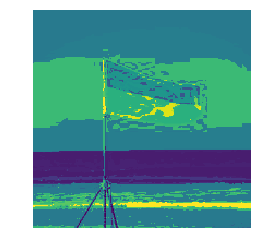

In [32]:
imgq = quantification(img)
axis('off')
plt.imshow(imgq)

## 4. Histogramme de couleur

In [8]:
nbc = 63  # 64 couleurs possibles

In [9]:
def histogramme(img):
    h = np.zeros(nbc)

    for v in range(0, nbc):
        for k in range(1, l):
            for j in range(1, c):
                if img[k, j] == v:
                    h[v] = h[v] + 1

    return(h)

Text(0.5,1,'Histogramme de couleur de l image quantifiée')

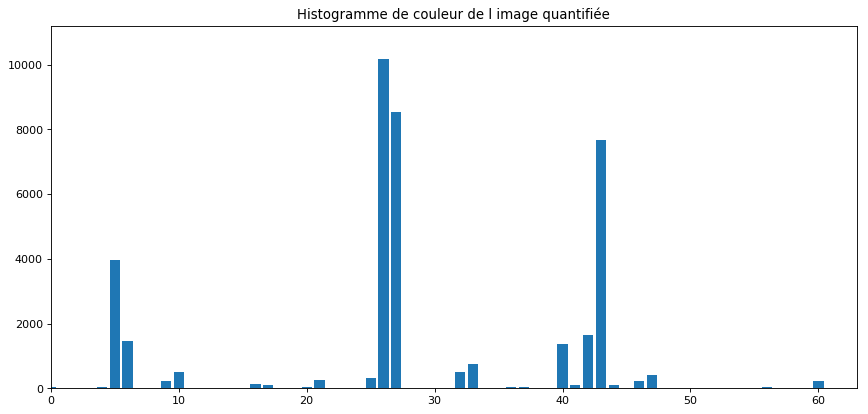

In [10]:
plt.figure(figsize=(13, 6), dpi=80)
plt.bar(range(0, nbc), histogramme(imgq))
plt.axis([0, nbc, 0, 1.1 * np.max(histogramme(imgq))])
plt.title('Histogramme de couleur de l image quantifiée')

Il y a 64 couleurs possibles. 3 d'entre elles sont largement majoritaires.

## 5. Indexation d'image

In [11]:
def indexation(a, b):  # cette fonction permet d'indexer les images numérotées de a à b
    H = []  # H est le vecteur qui contiendra tous les histogrammes

    for i in range(a, b):
        nomim = str(i)

        # on définit le nom du chemin/fichier, en ajoutant un 0 devant les indices de 1 à 9
        if i < 10:
            nomfichier = f'0{nomim}.jpg'
        else:
            nomfichier = f'{nomim}.jpg'

        img = imread(nomfichier)
        l, c, p = img.shape  # taille de l'image
        imgq = quantification(img)  # application de la fonction quantification
        h = histogramme(imgq)  # application de la fonction histogramme
        H.append(h)  # ajout de l'histogramme au vecteur H

    return H  # retourne l'ensemble des histogrammes

In [12]:
ens_histo = indexation(1, 51)

## 6. Recherche d'images similaires par la couleur

In [13]:
def simil(a):
    nomim = str(a)
    if a < 10:
        nomfichier = f'0{nomim}.jpg'
    else:
        nomfichier = f'{nomim}.jpg'
    img = imread(nomfichier)
    axis('off')
    plt.imshow(img)
    plt.title(a)

    # "a" est le numéro de l'image d'entrée, h1 son histogramme
    h1 = ens_histo[a-1]
    D = []  # D est le vecteur qui permettra de stocker les distances

    for i in range(0, 49):  # on passe en revue toutes les images dans l'ordre
        if i == (a-1):
            # si l'image est l'image d'entrée, on donne 0 à la place de la distance
            D.append(0)
        else:
            h2 = ens_histo[i-1]  # sinon, h2 est l'histogramme de l'image
            s = 0

            for v in range(0, nbc):
                # on calcule l'interesction pour chaque "barre" des histogrammes
                d = min(h1[v], h2[v])
                s = s + d  # l'intersection totale est la somme des min

            D.append(s)  # on remplit D avec les distances

    # plus l'intersection est grande, plus les images sont proches
    # on cherche donc les 5 valeurs maximum dans le vecteur D pour noter leur indice, qui correspond au numéro de l'image

    M = D.copy()
    indice_max = []  # vecteur qui contiendra les indices des 5 images les plus semblables à a

    for j in range(0, 5):
        ind = M.index(max(M)) + 1  # on relève l'indice du maximum de M
        indice_max.append(ind)  # on ajoute cet indice au vecteur indice_max
        # on remplace le maximum par 0 dans M afin de pouvoir itérer en cherchant un nouveau maximum
        M[ind-1] = 0

    S = indice_max
    plt.figure(1)
    plt.figure(figsize=(16, 10), dpi=80)
    k = 0

    for i in (S[0], S[1], S[2], S[3], S[4]):
        nomim = str(i)
        if i < 10:
            nomfichier = f'0{nomim}.jpg'
        else:
            nomfichier = f'{nomim}.jpg'
        img = imread(nomfichier)
        plt.subplot(351 + k)
        axis('off')
        plt.imshow(img)  # affichage des images
        plt.title(i)
        k = k + 1

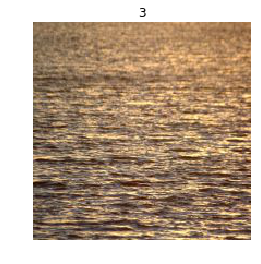

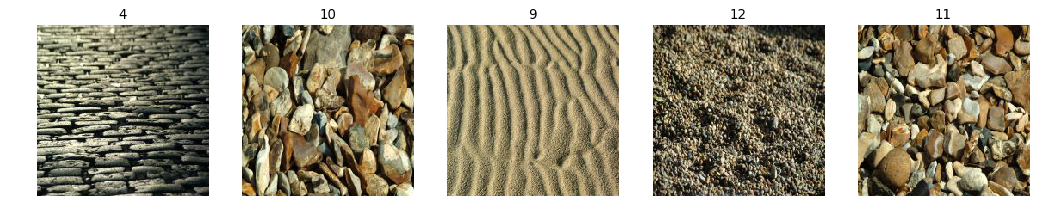

In [14]:
# exemple
simil(3)

## 7. Variante : sous-échantillonnage sur 3 bits par composante

In [20]:
def quantification3b(img):
    imgR = img[:, :, 0]
    imgG = img[:, :, 1]
    imgB = img[:, :, 2]
    # 3 bits par composante
    R7 = np.bitwise_and(imgR, 128)/128
    R6 = np.bitwise_and(imgR, 64)/64
    R5 = np.bitwise_and(imgR, 32)/32
    G7 = np.bitwise_and(imgG, 128)/128
    G6 = np.bitwise_and(imgG, 64)/64
    G5 = np.bitwise_and(imgG, 32)/32
    B7 = np.bitwise_and(imgB, 128)/128
    B6 = np.bitwise_and(imgB, 64)/64
    B5 = np.bitwise_and(imgB, 32)/32
    imgq = R7*2**8 + R6*2**7 + R5*2**6 + G7*2**5 + \
        G6*2**4 + G5*2**3 + B7*2**2 + B6*2**1 + B5*2**0
    return imgq

Text(0.5,1,'Histogramme de couleur de l image 45 quantifiée (3 bits par composante)')

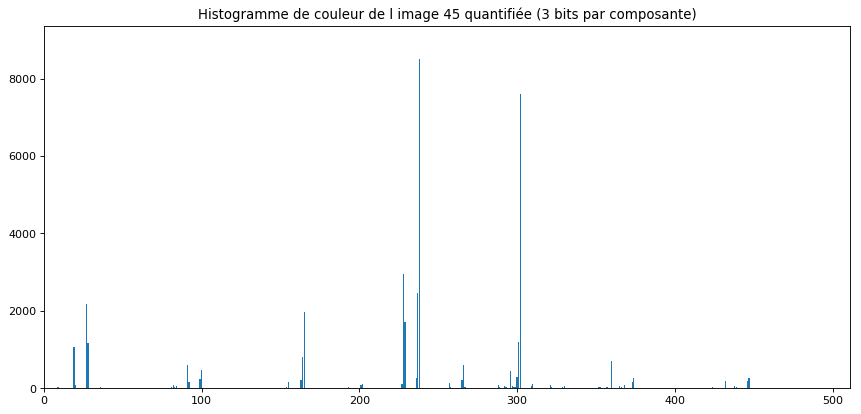

In [22]:
imgq3 = quantification3b(img)  # quantification de l'image 45
nbc = 511  # 512 couleurs possibles

# affichage de l'histogramme de l'image 45 quantifiée
plt.figure(figsize=(13, 6), dpi=80)
plt.bar(range(0, nbc), histogramme(imgq3))
plt.axis([0, nbc, 0, 1.1 * np.max(histogramme(imgq3))])
plt.title('Histogramme de couleur de l image 45 quantifiée (3 bits par composante)')

In [23]:
def indexation3b(a, b):
    H = []

    for i in range(a, b):
        nomim = str(i)

        if i < 10:
            nomfichier = f'0{nomim}.jpg'
        else:
            nomfichier = f'{nomim}.jpg'

        img = imread(nomfichier)
        l, c, p = img.shape
        imgq = quantification3b(img)
        h = histogramme(imgq)
        H.append(h)

    return H

In [24]:
ens_histo3b = indexation3b(1, 51)

In [25]:
def simil3b(a):
    nomim = str(a)
    if a < 10:
        nomfichier = f'0{nomim}.jpg'
    else:
        nomfichier = f'{nomim}.jpg'
    img = imread(nomfichier)
    axis('off')
    plt.imshow(img)
    plt.title(a)

    h1 = ens_histo3b[a-1]
    D = []

    for i in range(0, 49):
        if i == (a-1):
            D.append(0)
        else:
            h2 = ens_histo3b[i-1]
            s = 0

            for v in range(0, nbc):
                d = min(h1[v], h2[v])
                s = s + d

            D.append(s)

    M = D.copy()
    indice_max = []

    for j in range(0, 5):
        ind = M.index(max(M)) + 1
        indice_max.append(ind)
        M[ind-1] = 0

    S = indice_max
    plt.figure(1)
    plt.figure(figsize=(16, 10), dpi=80)
    k = 0

    for i in (S[0], S[1], S[2], S[3], S[4]):
        nomim = str(i)
        if i < 10:
            nomfichier = f'0{nomim}.jpg'
        else:
            nomfichier = f'{nomim}.jpg'
        img = imread(nomfichier)
        plt.subplot(351 + k)
        axis('off')
        plt.imshow(img)
        plt.title(i)
        k = k + 1

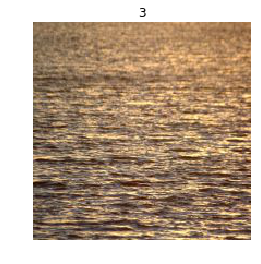

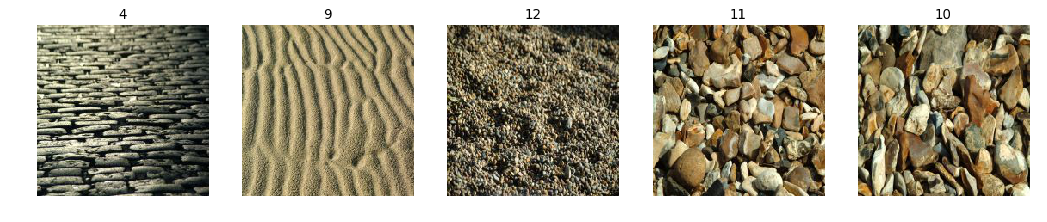

In [26]:
# exemple
S = simil3b(3)